## Learning Rage(학습 속도) 란?

-

-

-

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
def mse(y_pred, y):
    cost = np.sum((y - y_pred)**2) / len(y)
    return cost

In [24]:
n_samples = 200

x1 = np.random.randn(n_samples)
y = 2 * x1 + 4 + np.random.randn(n_samples)

# 반복 횟수
num_epoch = 10

# learning rate
lr = 0.7

w1 = np.random.uniform()
b = np.random.uniform()

w_val = []
cost_val = []

for epoch in range(num_epoch):
    y_pred = w1 * x1 + b
    # cost = np.abs(y_pred - y).mean()    # MAE
    cost = mse(y_pred, y)
    print(f"{epoch:2} w1 = {w1:.6f}, b = {b:.6f} , cost = {cost:.6f}")

    w1 = w1 - lr * ((y_pred - y) * x1).mean()
    b = b - lr * ((y_pred - y)).mean()

    w_val.append(w1)
    cost_val.append(cost)

0 w1 = 0.044506, b = 0.774269 , cost = 14.599449
 1 w1 = 1.275470, b = 2.976779 , cost = 2.484612
 2 w1 = 1.683766, b = 3.708428 , cost = 1.148703
 3 w1 = 1.819257, b = 3.951439 , cost = 1.001392
 4 w1 = 1.864231, b = 4.032146 , cost = 0.985148
 5 w1 = 1.879163, b = 4.058948 , cost = 0.983356
 6 w1 = 1.884120, b = 4.067849 , cost = 0.983159
 7 w1 = 1.885766, b = 4.070804 , cost = 0.983137
 8 w1 = 1.886313, b = 4.071786 , cost = 0.983135
 9 w1 = 1.886494, b = 4.072112 , cost = 0.983134


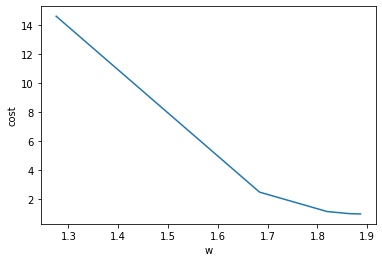

In [27]:
plt.plot(w_val, cost_val)
plt.xlabel('w')
plt.ylabel('cost')
plt.show()

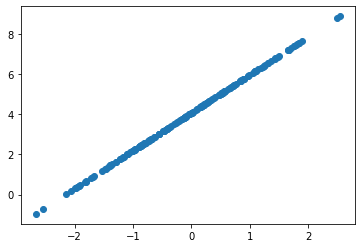

In [76]:
plt.plot(x1, y_pred, 'o')
plt.show()

# 일반 선형회귀

예측값과 실제값의 cost를 최소화할 수 있도록 W(가중치, 회귀계수)를 최적화하며, 규제(Regularization)를 적용하지 않은 모델

### 단순 선형회귀 (Simple Linear Regression)


### 다변수 선형회귀 (Multi-variable Linear Regression)


### 다항 회귀 (Polynomial Regression)

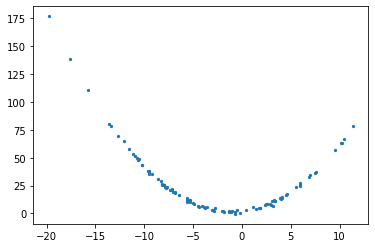

In [74]:
# 단순 직선으로 어려운 곡선 예시
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

n = 100
np.random.seed(123)

# 임의의 수
x = 6 * np.random.randn(n, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(n, 1)

plt.scatter(x, y, s=5)
plt.show()

## Linear Regression 실습 01

**LinearRegression()**

-

-

-

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

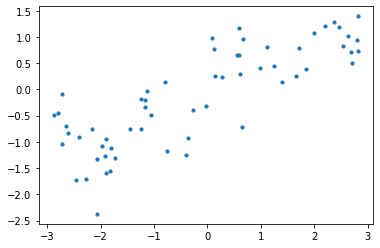

In [73]:
np.random.seed(0)

def make_wave(n_samples=100):
    rnd = np.random.RandomState(42)
    x = rnd.uniform(-3, 3, size=n_samples)
    y_no_noise = (np.sin(4 * x) + x)
    y = (y_no_noise + rnd.normal(size=len(x))) / 2
    return x.reshape(-1, 1), y

X, y = make_wave(60)
plt.scatter(X, y, s=10)
plt.show()

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45, 1), (15, 1), (45,), (15,))

In [60]:
# 모델 학습
model = LinearRegression()
model.fit(X_train, y_train)

# w(가중치)
print('w: ', model.coef_)

# b(편향)
print('b: ', model.intercept_)

w:  [0.39390555]
b:  -0.03180434302675973


In [63]:
print("훈련 세트 점수: ", round(model.score(X_train, y_train), 2))

훈련 세트 점수:  0.67


In [65]:
print("테스트 세트 점수: ", round(model.score(X_test, y_test), 2))

테스트 세트 점수:  0.66


- model.score() 를 이용해서 과대적합인지 과소적합인지 확인 할 수 있다.

- 둘다 낮으면 과소적합

- 훈련 세트 점수가 테스트 점수 보다 많이 높으면 과대 적합

- 1차원 데이터셋에서는 모델이 매우 단순하므로 (혹은 제한적이므로) 과대적합을 걱정할 필요없다.

- (특성이 많은) 고차원 데이터셋에서는 선형 모델의 성능이 매우 높아져서 과대적합일 가능성이 높다

## LinearRegression 실습 02

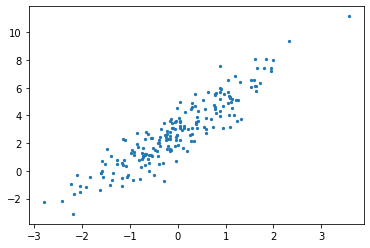

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

n = 200
x = np.random.randn(n)

w = 2
b = 3

y = w * x + b + np.random.randn(n)
plt.scatter(x, y, s=5)
plt.show()

In [85]:
x.shape

# 2차원으로 변경
x = x.reshape(-1, 1)

In [86]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [89]:
print('w: ', model.coef_)
print('b: ', model.intercept_)

w:  [2.14780215]
b:  2.8932084127875997


## LinearRegression 실습 02-2

변수가 2개인 경우

다변수 선형 회귀

In [90]:
n = 200
x1 = np.random.randn(n)
x2 = np.random.randn(n)

w1, w2 = 2, 3
b = 4

y = w1 * x1 + w2 * x2 + b + np.random.randn(n)

In [103]:
# x1 과 x2 합치기
x = pd.DataFrame({'x1': x1, 'x2': x2})

In [107]:
model = LinearRegression()
model.fit(x, y)

print(model.coef_)
print(model.intercept_)

[2.06839289 2.95467154]
4.082136902367497
